**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [2]:
class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.algorithm = algorithm
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.Xmin_max = (np.min(X), np.max(X))
        self.X_train = (X - np.min(X)) / (np.max(X) - np.min(X))
        self.X_train_squares = (self.X_train ** 2).sum(axis=1)
        self.y_train = np.array(y).astype(int)
        self.classes = np.unique(y)
        if self.algorithm == 'kd_tree':
            self.kd_tree = KDTree(self.X_train)

    def predict(self, X):
        n = self.nearest_points(X).astype(np.int32, copy=False)
        count = np.apply_along_axis(
            lambda x: np.bincount(x).argmax().astype(np.int32, copy=False),
            1, n)
        return count

    def nearest_points(self, X_test):
        X_test = (X_test - self.Xmin_max[0]) / (self.Xmin_max[1] - self.Xmin_max[0])
        if self.algorithm == 'brute':
            X_test_squares = (X_test ** 2).sum(axis=1)
            dists = np.sqrt(X_test_squares.reshape(-1, 1)
                            + self.X_train_squares
                            - 2 * np.dot(X_test, self.X_train.T))
            nearest_points_indexes = np.argsort(dists)[:, :self.n_neighbors]
        else:
            temp, nearest_points_indexes = self.kd_tree.query(
                np.array(X_test).astype(np.double, copy=False),
                k=self.n_neighbors)
        return self.y_train[nearest_points_indexes]

    def predict_proba(self, X):
        nearp = self.nearest_points(X)
        predicts = np.zeros((X.shape[0], self.classes.size))
        for cl in self.classes:
            predicts[:, cl] = np.sum(cl == nearp, axis=1)
        predicts /= self.n_neighbors
        return predicts

    def score(self, X, y):
        return (self.predict(X) == y).mean()

**IRIS**

In [14]:
iris = datasets.load_iris()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [16]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [17]:
%time clf.fit(X_train, y_train)

Wall time: 1.95 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
%time my_clf.fit(X_train, y_train)

Wall time: 997 µs


In [19]:
%time clf.predict(X_test)

Wall time: 997 µs


array([1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0])

In [20]:
%time my_clf.predict(X_test)

Wall time: 1 ms


array([1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0])

In [21]:
%time clf.predict_proba(X_test)

Wall time: 995 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [22]:
%time my_clf.predict_proba(X_test)

Wall time: 997 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [23]:
clf.score(X_test, y_test)

1.0

In [24]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Best score=0.976222222222223, numbers of nearp=11


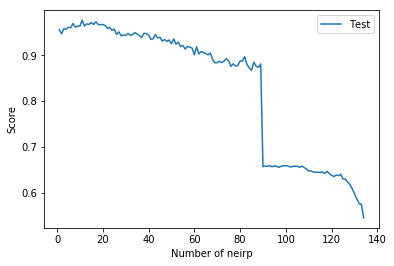

In [25]:
max_number_of_test = 300
nearp_best = 0
score_test = np.array([])
nearp = range(1, X_train.shape[0])
for n in nearp:
    score = 0
    for test in range(1, max_number_of_test):
        X_train, X_test, y_train, y_test = train_test_split(
                iris.data, iris.target, test_size=0.1, stratify=iris.target)
        clf = KNeighborsClassifier(n_neighbors=n)
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        score += my_clf.score(X_test, y_test)
    score_test = np.append(score_test, score/max_number_of_test)
nearp_best = np.argmax(score_test)+1
print("Best score={0}, numbers of nearp={1}".format(
    score_test[nearp_best-1], nearp_best))
plt.xlabel("Number of neirp")
plt.ylabel("Score")
plt.plot(nearp, score_test, label="Test")
plt.legend()

**MNIST**

In [26]:
from mlxtend.data import loadlocal_mnist

In [27]:
X_train, y_train = loadlocal_mnist(images_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/train-images.idx3-ubyte', 
                                    labels_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/t10k-images.idx3-ubyte', 
                                    labels_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/t10k-labels.idx1-ubyte')
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [29]:
%time clf.fit(X_train, y_train)

Wall time: 23.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

Wall time: 562 ms


In [31]:
%time clf.predict(X_test)

Wall time: 16min 9s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
%time my_clf.predict(X_test)

Wall time: 1min 33s


array([7, 2, 1, ..., 4, 5, 6])

In [33]:
%time clf.predict_proba(X_test)

Wall time: 14min 6s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 31s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
clf.score(X_test, y_test)

0.9627

In [36]:
my_clf.score(X_test, y_test)

0.9627

Задание 4

In [37]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [38]:
X_train, y_train = loadlocal_mnist(images_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/train-images.idx3-ubyte', 
                                    labels_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/t10k-images.idx3-ubyte', 
                                    labels_path='C:/Users/Dell/Documents/GitHub/spheremailru/01/t10k-labels.idx1-ubyte')
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [39]:
%time clf.fit(X_train, y_train)

Wall time: 18.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [40]:
%time my_clf.fit(X_train, y_train)

Wall time: 16.9 s


In [41]:
%time clf.predict(X_test)

Wall time: 13min 28s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [42]:
%time my_clf.predict(X_test)

Wall time: 12min 46s


array([7, 2, 1, ..., 4, 5, 6])

In [43]:
%time clf.predict_proba(X_test)

Wall time: 12min 27s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
%time my_clf.predict_proba(X_test)

Wall time: 12min 42s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
clf.score(X_test, y_test)

0.9627

In [46]:
my_clf.score(X_test, y_test)

0.9627

Задание 5

In [ ]:
# seaborn это более высокоуровневое API на базе библиотеки matplotlib. Data visualization library
# matplotlib библиотека для визуализации данных двумерной (2D) графикой (3D графика также поддерживается)
# train_test_split разделение датасета на train и test
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) Последовательное применение списка преобразований и получение окончательной оценки.
#                                                           Промежуточными шагами конвейера должны быть "преобразования", то есть они должны реализовывать методы fit и transform.
#                                                           Окончательная оценка только должна реализовать fit. 
#                                                           Трансформаторы в конвейере можно кэшировать с помощью аргумента memory.
# StandardScaler (from sklearn.preprocessing import StandardScaler) Смещение на среднее, шкалирование
# ClassifierMixin базовый класс для всех классификаторов (sklern)
# NeighborsBase базовый класс для всех алгоритмов "ближайших соседей",содержит базовую функциональность метода fit (sklern)
# KNeighborsMixin базовый класс для алгоритма kNN, в нем определены методы для поиска ближайших соседей (sklern)
# SupervisedIntegerMixin базовый класс для kNN классификатора (sklern)